# Import library

In [2]:
import os
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings("ignore")

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.special import boxcox1p
from sklearn.datasets import load_breast_cancer
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_moons
import xgboost

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호도 표시
from matplotlib import font_manager, rc

## 한글 깨짐 방지 목적 
font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family = font_name)

## For Mac
# rc('font', family='/Library/Fonts/AppleGothic.ttf')


from IPython.display import Image
import mglearn
import graphviz
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Decision Tree

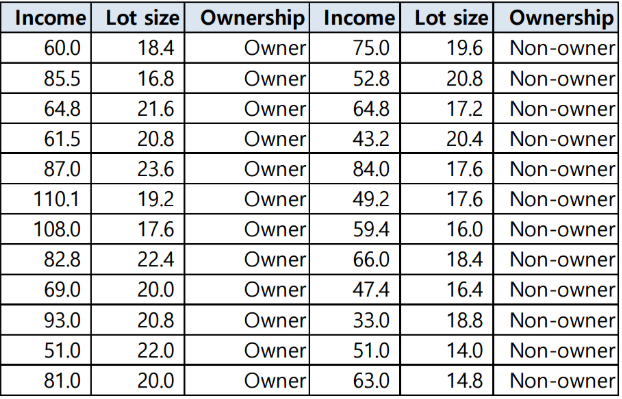

In [4]:
Image('decision tree example.png')

## Key Word

- 정보획득(Information gain)
- Homogeneity(순도) / Impurity(불순도) or Uncertainty
- 0 <= Entropy <= 1
- Recursive partitioning & pruning
- Root Node(뿌리 노드) / Terminal Node
- Leaf Node(잎 노드)
- Parent Node / Child Node
- Pure Node(순수 노드) : 타깃 하나로만 이뤄진 리프 노드  
- Cost function(비용함수)
- Extrapolation / Interpolation
- Decision Tree model advantage 
    - 시각적으로 모델을 쉽게 설명할 수 있다
    -  각 피쳐가 개별적으로 처리데어 데이터를 분할 -> 스케일 영향을 받지 않아 특성의 정규화 또는 표준화 전처리 작업 필요 X
    -  특히 특성의 스케일이 서로 다르거나 이진 특성곽 연속적인 특성이 혼합되어 있을 때도 잘 작동한다.
- Decision Tree model diadvantage
    - 과대적합에 빠지기 쉽다

## Scikit learn을 활용한 Decision Tree

아래와 같은 상황은 무엇일까?

In [2]:
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,
                                                 cancer.target,
                                                 stratify = cancer.target,
                                                 random_state = 42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train,y_train)

print("accuracy in train set : {:.4f}".format(tree.score(X_train,y_train)))
print("accuracy in test set : {:.4f}".format(tree.score(X_test,y_test)))

accuracy in train set : 1.0000
accuracy in test set : 0.9371


### How to solve Overfitting in Decision Tree model
- 나무의 깊이에 대한 조건을 걸어주는 것은 어떨까?
    - 1) max_leaf_nodes
    - 2) min_samples_leaf
    - 3) max_depth

In [3]:
tree2 = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree2.fit(X_train,y_train)

print("accuracy in train set : {:.4f}".format(tree2.score(X_train,y_train)))
print("accuracy in test set : {:.4f}".format(tree2.score(X_test,y_test)))

accuracy in train set : 0.9883
accuracy in test set : 0.9510


In [4]:
export_graphviz(tree2,
                out_file = "tree2.dot",
                class_names = ['악성','양성'],
                feature_names = cancer.feature_names,
                impurity = False,
                filled = True)

In [5]:
# with open('tree2.dot','rt',encoding='UTF8') as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

### Feature Importance
- Feature Importance값이 낮은 Feature가 유용하지 않다는 뜻이 아니다.
- Decision Tree model이 다른 Instance와 구분할 수 있는 정도의 Feature값이 아니라고 판단한 것이다.
- 선형 모델과는 달리 Feature Importance는 항상 양수이다.
    - 즉 해당 특성이 어떤 클래스를 지지하는지 알 수 없다.

In [6]:
print("특성 중요도 : \n\n {}".format(tree2.feature_importances_))

특성 중요도 : 

 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


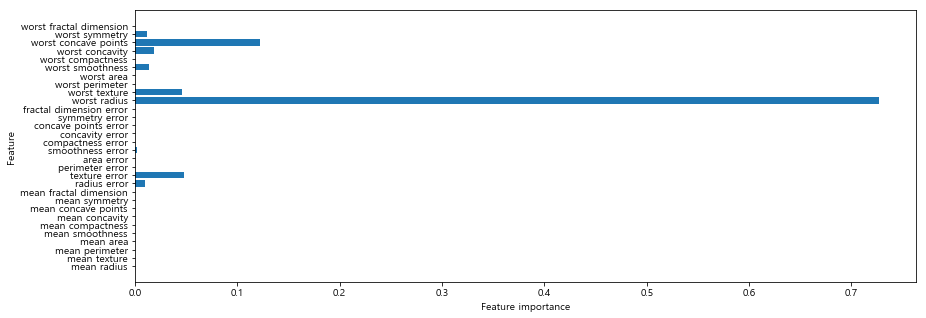

In [21]:
def plot_feature_importance(model):
    fig,ax = plt.subplots(figsize= (14,5))
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel('Feature')
plot_feature_importance(tree2)

p)111
- 하나의 예측 변수로 클래스를 나눌 수 있나?

Feature importances: [0. 1.]


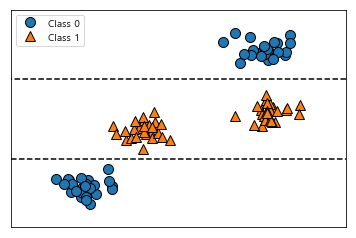

In [8]:
ex = mglearn.plots.plot_tree_not_monotone()

### Interpolation < Regression in Decision Tree < Extrapolation

In [9]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,'ram_price.csv'))
print(ram_prices.head(2))
ram_prices = ram_prices.iloc[:,1:]

   Unnamed: 0    date        price
0           0  1957.0  411041792.0
1           1  1959.0   67947725.0


Text(0, 0.5, 'log price($/Mbyte)')

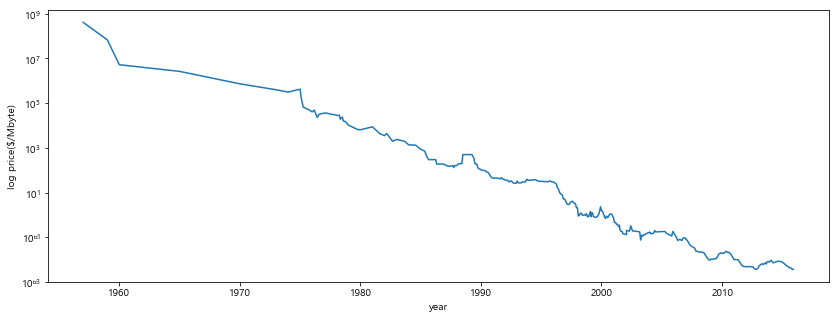

In [10]:
# matplotlib.semilogy : https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.semilogy.html
fig,ax = plt.subplots(figsize = (14,5))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('year')
plt.ylabel('log price($/Mbyte)')

min year in train set 1957.0
max year in train set 1999.92
min year in test set 2000.0
max year in test set 2015.92


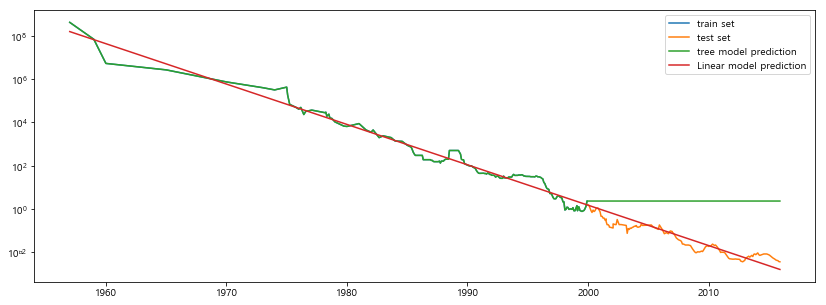

In [11]:
# Split data #
data_train = ram_prices[ram_prices.date<2000]
data_test = ram_prices[ram_prices.date>=2000]

# Only use time variable #
X_train = data_train.date[:,np.newaxis]
y_train = np.log(data_train.price)

# Train model #
tree = DecisionTreeRegressor().fit(X_train,y_train)
linear = LinearRegression().fit(X_train,y_train)

# Prediction range = whole time #
x_all = ram_prices.date[:,np.newaxis]

# Prediction #
pred_tree = tree.predict(x_all)
pred_linear = linear.predict(x_all)

# Predict value #
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_linear)

print('min year in train set',min(data_train['date']))
print('max year in train set',max(data_train['date']))
print('min year in test set',min(data_test['date']))
print('max year in test set',max(data_test['date']))

# showing graph #
fig,ax = plt.subplots(figsize = (14,5))
plt.semilogy(data_train.date,data_train.price,label = 'train set')
plt.semilogy(data_test.date,data_test.price,label = 'test set')
plt.semilogy(ram_prices.date,price_tree,label = 'tree model prediction')
plt.semilogy(ram_prices.date,price_lr,label = 'Linear model prediction')
plt.legend()

# Ensemble

- Random Forest
- Gradient Boosting

## Random Forest

### Keyword

- Bootstrap sample
- Radom forest in Scikit Learn
    - n_estimators
    - max_features
        - auto mode:
            - sqrt(n_features) in RandomForestClassifier 
            - n_features in RandomForestRegressor
      

### 랜덤 포레스트에서 트리를 랜덤하게 만드는 방법
- 1) Instance를 무작위로 선택 
- 2) 분할 테스트에서 Feature를 무작위로 선택

In [12]:
X,y = make_moons(n_samples = 100,noise = 0.25,random_state = 3)
X_train,X_test, y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

In [13]:
forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

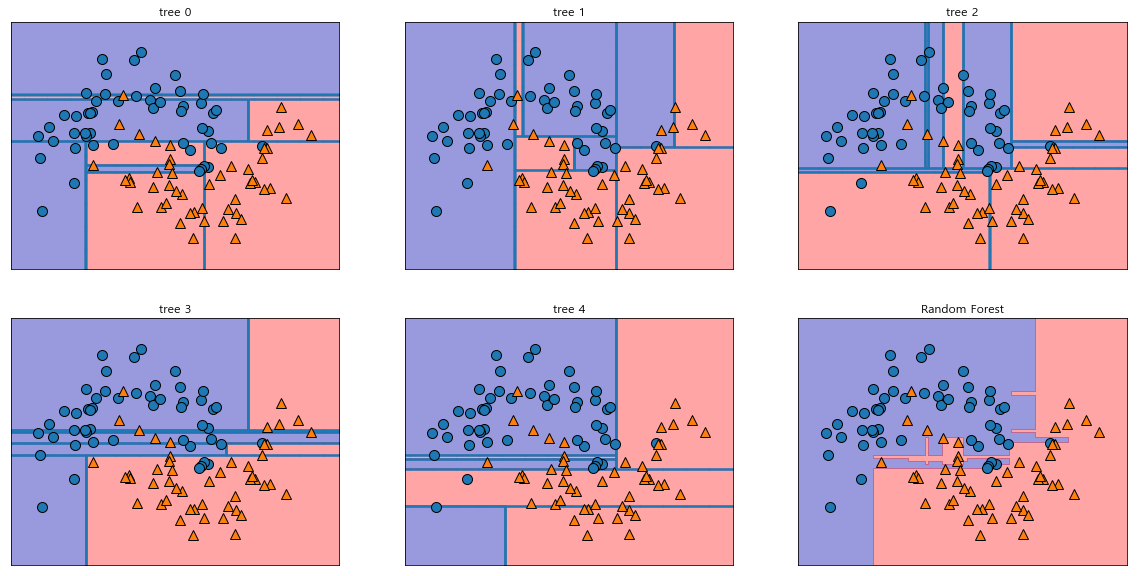

In [14]:
fig,axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)
    
mglearn.plots.plot_2d_separator(forest,X,fill=True,ax=axes[-1,-1],alpha=0.4)
axes[-1,-1].set_title('Random Forest')
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state = 0)
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train,y_train)

print('acc in train set : {}'.format(forest.score(X_train,y_train)))
print('acc in test set : {}'.format(forest.score(X_test,y_test)))

acc in train set : 1.0
acc in test set : 0.972027972027972


Feature Importance in 단일 Tree model VS Feature Importance in Random Forest

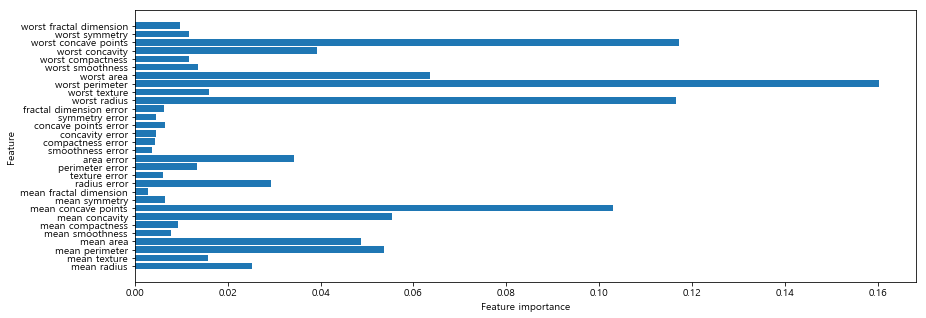

In [22]:
plot_feature_importance(forest)

## Gradient Boosting 

- 이전 트리의 오차를 보완하는 방식으로 순차적인 트리를 생성하는 원리
- No Randomness
- Strong Pruning
- Connect Weak Learner

### Keyword

- Learning rate
- n_estimators
- learning rate
- max_depth(Generally set max_depth < 5) / max_leaf_nodes

overfitting 발생

In [26]:
X_train,X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state = 0)
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train,y_train)

print(gbrt)
print()
print('acc in train set : {}'.format(gbrt.score(X_train,y_train)))
print('acc in test set : {}'.format(gbrt.score(X_test,y_test)))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

acc in train set : 1.0
acc in test set : 0.958041958041958


max_depth = 1

In [27]:
gbrt = GradientBoostingClassifier(random_state = 0,max_depth = 1)
gbrt.fit(X_train,y_train)

print(gbrt)
print()
print('acc in train set : {}'.format(gbrt.score(X_train,y_train)))
print('acc in test set : {}'.format(gbrt.score(X_test,y_test)))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

acc in train set : 0.9906103286384976
acc in test set : 0.972027972027972


learning rate = 0.01

In [28]:
gbrt = GradientBoostingClassifier(random_state = 0,learning_rate = 0.01)
gbrt.fit(X_train,y_train)


print(gbrt)
print()
print('acc in train set : {}'.format(gbrt.score(X_train,y_train)))
print('acc in test set : {}'.format(gbrt.score(X_test,y_test)))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

acc in train set : 0.9882629107981221
acc in test set : 0.965034965034965


Feature Importance in 단일 Tree model VS Feature Importance in Random Forest VS Feature Importance in GradientBoosting

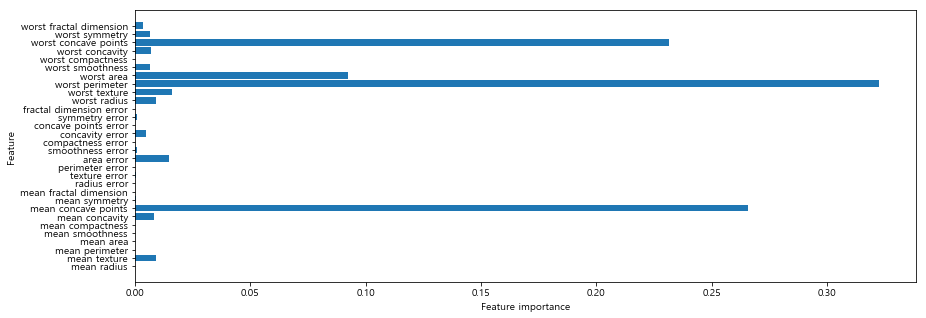

In [29]:
gbrt = GradientBoostingClassifier(random_state = 0,max_depth = 1)
gbrt.fit(X_train,y_train)

plot_feature_importance(gbrt)